In [100]:
#Import Modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
gousto_veg = pd.read_csv(r"C:\Users\Josh\Documents\Personal Stuff\Health\Meals\Gousto Veg.csv")
gousto_meat = pd.read_csv(r"C:\Users\Josh\Documents\Personal Stuff\Health\Meals\Meat Gousto.csv")

In [102]:
#Combining the vegetarian with the omnivorous meals
gousto_veg_comb = gousto_veg.copy()
gousto_veg_comb["Veg?"] = 1
gousto_meat_comb = gousto_meat.copy()
gousto_meat_comb["Veg?"] = 0
gousto_all = pd.concat([gousto_meat_comb, gousto_veg_comb])

In [103]:
#Inspecting the first rows of the vegetarian meals
print(gousto_veg.head())

                                                Name  Calories  Fat  \
0  Spiced Sweet Potato & Chickpea Stew with Couscous       459    4   
1           Chickpea Tikka Masala With Fragrant Rice       773   26   
2       Italian Bean Stew with Cheesy Roast Potatoes       532   16   
3        Slow Cooker Three Bean Chilli With Potatoes       422    2   
4               Creamy Mushroom Stroganoff with Rice       416   11   

   Saturated Fat  Carbs  Sugar  Fibre  Protein  Salt  
0            0.5     91     26     11       16   2.0  
1           18.0    100     26     16       20   2.0  
2            8.0     71     15     12       26   2.0  
3            0.4     77     10     20       20   2.0  
4            6.0     67      8      7       12   2.0  


In [110]:
#Inspecting the first rows of the omnivorous meals
print(gousto_meat.head())

                                                Name  Calories  Fat  \
0                     Sweet & Sour Chicken with Rice       566    2   
1             Smoky Chrizo & Egg Traybake with Salad       579   34   
2  Spiced Fishcakes with Peanut Salad & Tamarind ...       444    8   
3                                Chicken Katsu Curry       614    7   
4  Garlic Mash Topped Lamb Meatloaf with Peas & O...       482   18   

   Saturated Fat  Carbs  Sugar  Fibre  Protein  Salt  
0            1.0     97     22      3       38   2.0  
1            9.0     48     10      7       25   3.0  
2            1.0     63     22      8       31   2.0  
3            1.0     93     16      5       45   2.0  
4            8.0     50     14      8       33   1.0  


In [105]:
#Inspecting the vegetarian dataset
print(gousto_veg.info())
print('')
print(gousto_veg.describe())
print('')
print(gousto_veg[gousto_veg.isnull().any(axis=1)])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           38 non-null     object 
 1   Calories       38 non-null     int64  
 2   Fat            38 non-null     int64  
 3   Saturated Fat  38 non-null     float64
 4   Carbs          38 non-null     int64  
 5   Sugar          38 non-null     int64  
 6   Fibre          38 non-null     int64  
 7   Protein        38 non-null     int64  
 8   Salt           38 non-null     float64
dtypes: float64(2), int64(6), object(1)
memory usage: 2.8+ KB
None

         Calories        Fat  Saturated Fat       Carbs      Sugar      Fibre  \
count   38.000000  38.000000      38.000000   38.000000  38.000000  38.000000   
mean   496.763158  14.263158       5.550000   70.578947  15.552632  13.500000   
std    106.351644   7.511016       4.311879   20.464381   6.745158   4.316843   
min    235.000000   2.

In [106]:
#Inspecting the vegetarian dataset
print(gousto_meat.info())
print('')
print(gousto_meat.describe())
print('')
print(gousto_meat[gousto_meat.isnull().any(axis=1)])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           127 non-null    object 
 1   Calories       127 non-null    int64  
 2   Fat            127 non-null    int64  
 3   Saturated Fat  127 non-null    float64
 4   Carbs          127 non-null    int64  
 5   Sugar          127 non-null    int64  
 6   Fibre          127 non-null    int64  
 7   Protein        127 non-null    int64  
 8   Salt           127 non-null    float64
dtypes: float64(2), int64(6), object(1)
memory usage: 9.1+ KB
None

         Calories         Fat  Saturated Fat       Carbs       Sugar  \
count  127.000000  127.000000     127.000000  127.000000  127.000000   
mean   524.031496   16.110236       6.321260   60.574803   11.779528   
std    112.842420    9.762439       4.450462   14.979096    6.361982   
min    336.000000    2.000000       0.300000   25.000000

So there are no missing data points! All data types are as expected or reasonable.
The meat Dataset is significantly larger than the vegetarian dataset

In [107]:
def comparison_plotter(features):
    fig, ax = plt.subplots(len(features),2, figsize = (16,8*len(features)))
    n=0
    for feature in features:
        sns.histplot(x = feature, data = gousto_veg, color='red', stat="probability", label = "Veg", ax = ax[n,0])
        sns.histplot(x = feature, data = gousto_meat, color = 'blue', stat="probability", label = "Meat", ax = ax[n,0])
        ax[n,0].legend()
        sns.boxplot(x = 'Veg?', y = feature, data = gousto_all, ax=ax[n,1])
        n+=1
    plt.show()
    plt.close()

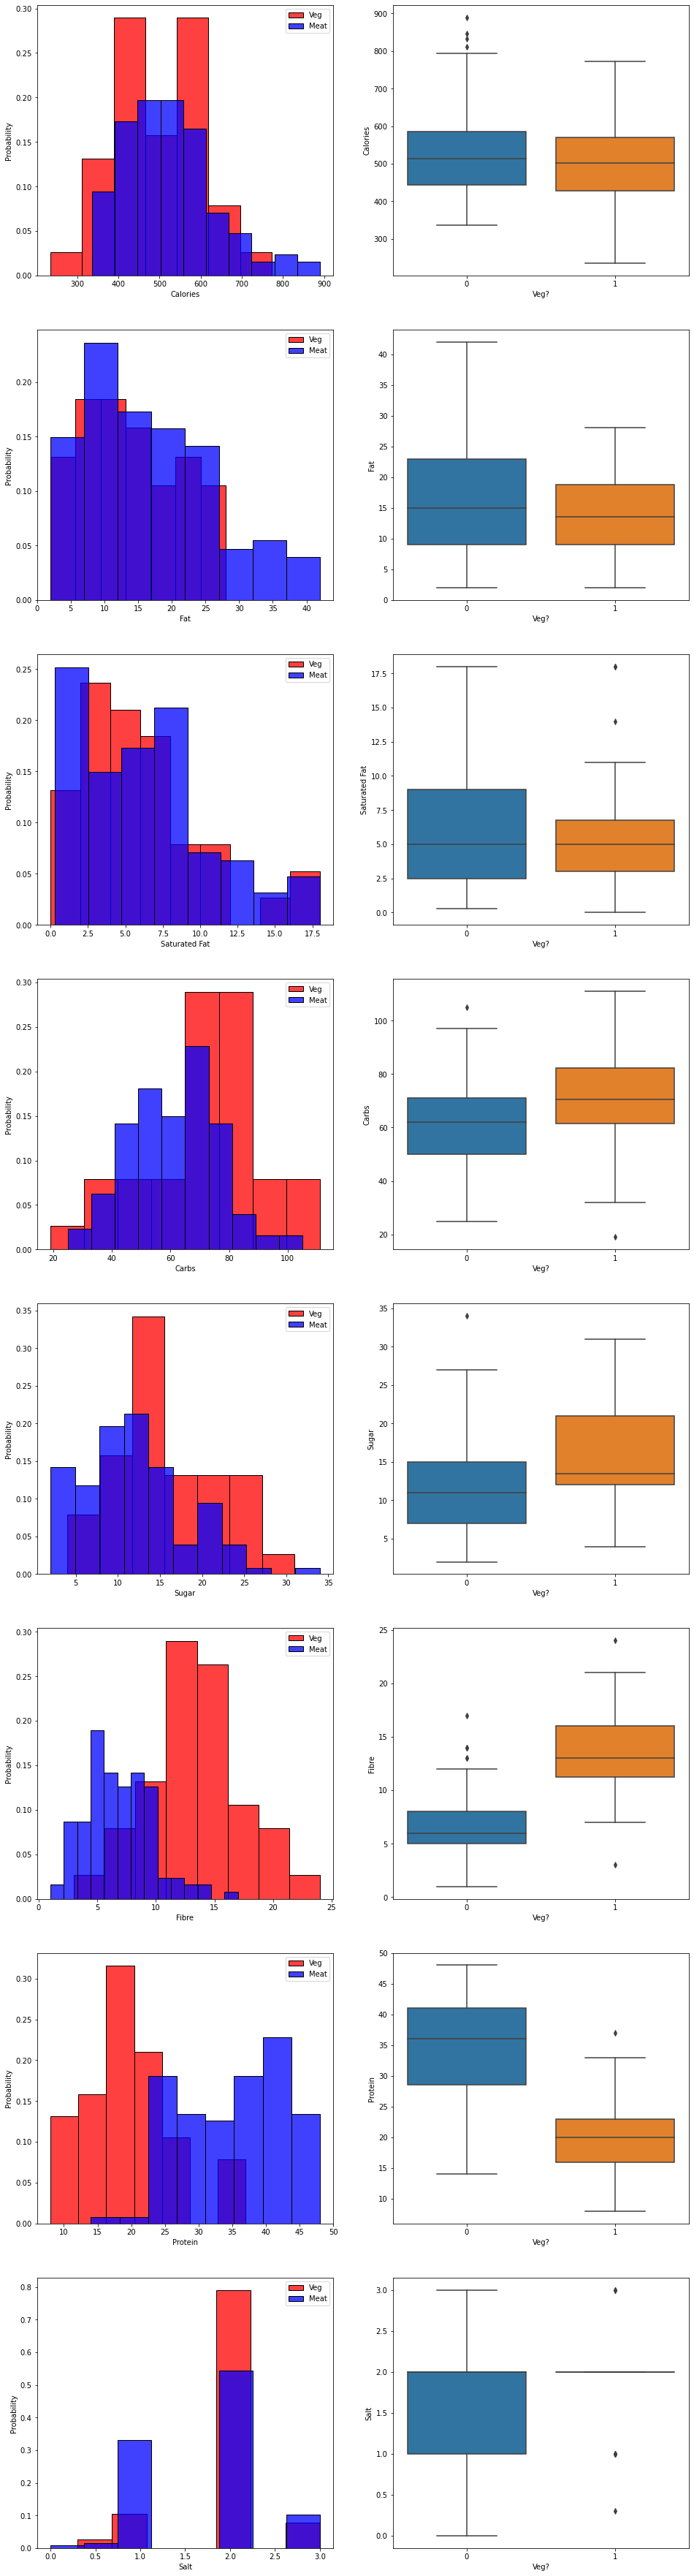

In [111]:
comparison_plotter(gousto_meat.columns.to_list()[1:])

Calorically, the vegetarian and omnivorous meals are very similar, with there being a slightly more prevelant right tail to the omnivore distribution.
Similarly, the level of fat/saturated fat is very similar for both, with there being less of a right tail for the vegetarian meals.
Carbohydrates is where they begin to differ, with vegetarian meals having significantly more carbohydrates, both in sugar and, more predominantly, in fibre. Visually, the spreads look approximately the same, however, this should be verified quantitatively.
Omnivorous meals have significantly larger amounts of protein than the vegetarian meals, also having a much larger spread to the data.
There appears to not be enough spread to the salt data, too many have the same, therefore no reliable judgements can be made from this.

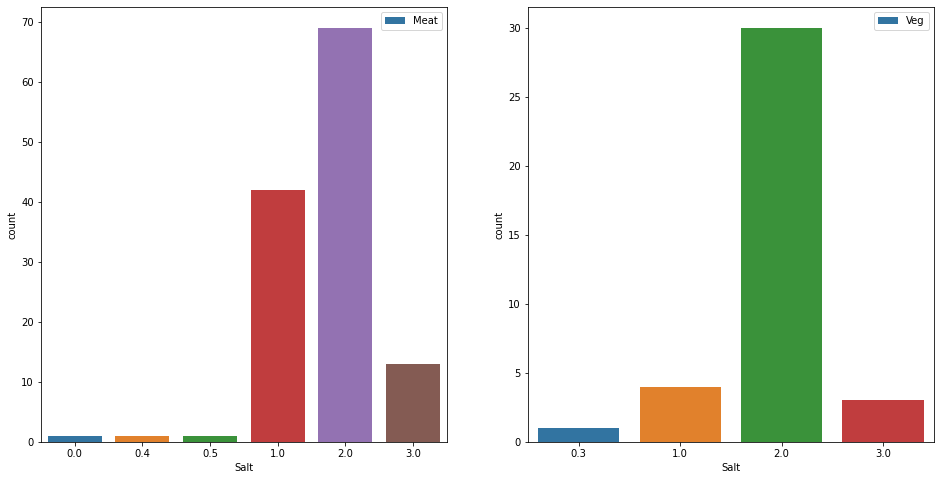

In [137]:
fig, ax = plt.subplots(1,2, figsize = (16,8))
sns.countplot(x='Salt', data = gousto_meat, ax=ax[0], alpha = 1, label = "Meat")
sns.countplot(x='Salt', data = gousto_veg, ax = ax[1], alpha = 1, label = "Veg")
#gousto_meat.Salt.value_counts().plot.pie(ax = ax[0,1])
ax[0].legend()
ax[1].legend()
plt.show()
plt.close()

In [138]:
print(gousto_meat.Salt.value_counts(normalize=True))
print(gousto_veg.Salt.value_counts(normalize=True))

2.0    0.543307
1.0    0.330709
3.0    0.102362
0.0    0.007874
0.5    0.007874
0.4    0.007874
Name: Salt, dtype: float64
2.0    0.789474
1.0    0.105263
3.0    0.078947
0.3    0.026316
Name: Salt, dtype: float64


The salt content appears similar.
It may be worth noting that the vegetarian dataset is much smaller than the omnivore dataset, so it is possible that there are insufficient data points for an accurate comparison.